![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 4: Network Analysis</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

In [1]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community
import pandas

plt.rc("savefig", dpi=300) # improve default resolution of graphics
sns.set(font_scale=.75)

In [2]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)
RC1014 = RC.yearSplit(2010,2014)

## Co-Author Networks

* produce network from record collection
* get quick stats

In [3]:
coauth_net = RC.networkCoAuthor() 
print(mk.graphStats(coauth_net))

Nodes: 10104
Edges: 15507
Isolates: 1111
Self loops: 0 
Density: 0.000303818
Transitivity: 0.555409


* modify network object in memory by dropping edges and self-loops
* modify network object by extracting the giant component (e.g. of *networkx*)

In [4]:
mk.dropEdges(coauth_net, minWeight = 2, dropSelfLoops = True) 
giant_coauth = max(nx.connected_component_subgraphs(coauth_net), key=len)
print(mk.graphStats(giant_coauth))

Nodes: 265
Edges: 443
Isolates: 0
Self loops: 0 
Density: 0.0126644
Transitivity: 0.285714


Of course we can use other *networkx* functions, such as computing centralities and global network properties.

/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


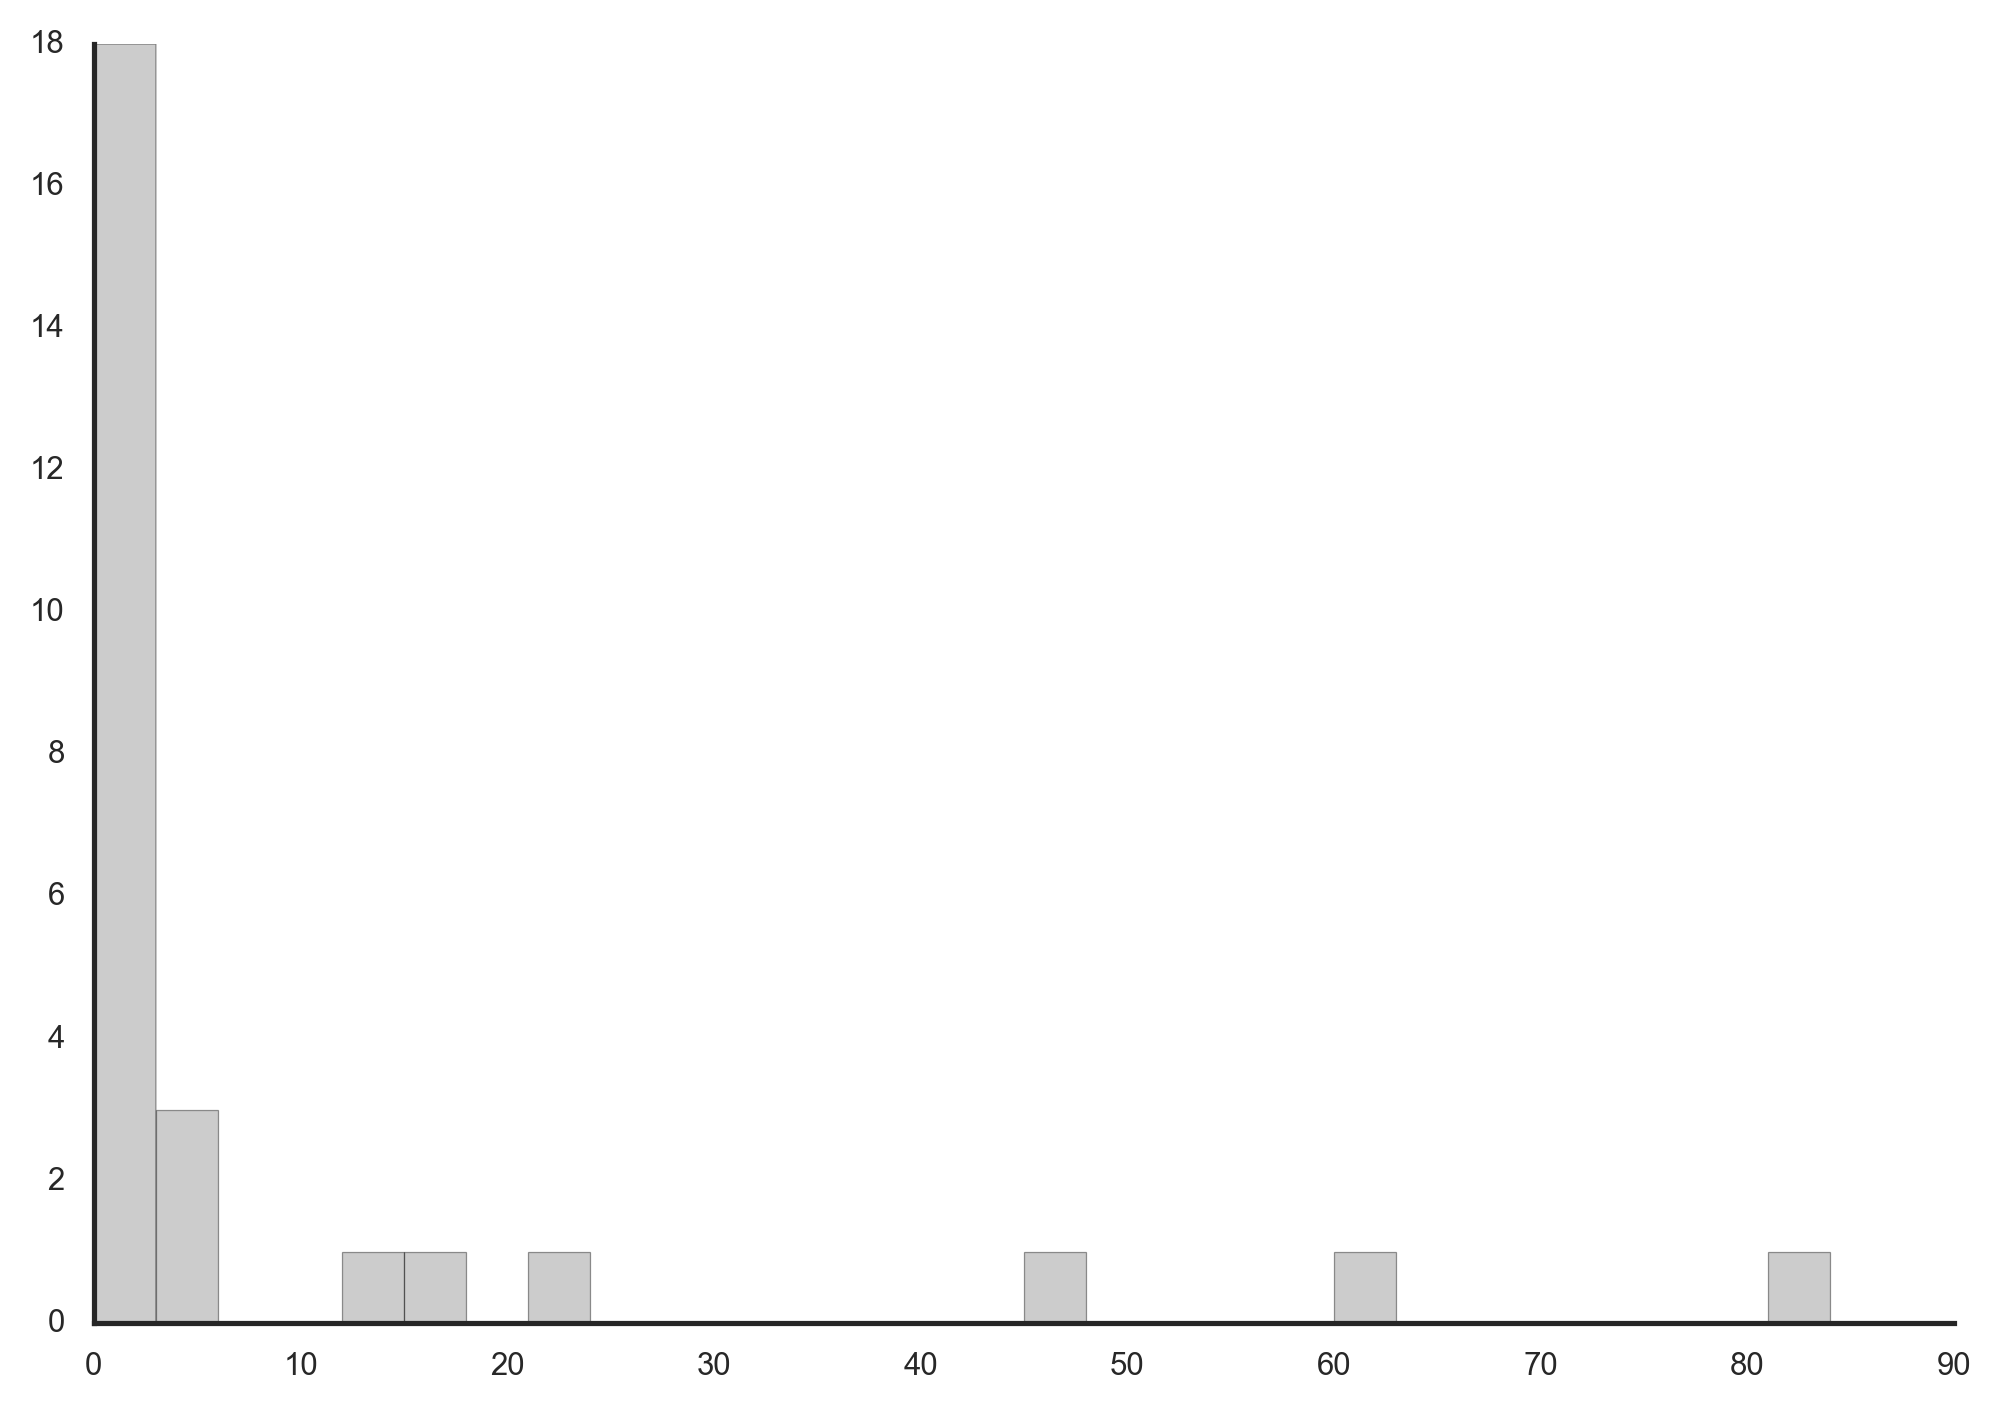

In [5]:
dh = nx.degree_histogram(giant_coauth)

with sns.axes_style("white"):
    sns.distplot(dh, kde=False, rug=False, color = "gray")
    sns.despine()
plt.savefig('figures/degree_histogram.pdf')

In [6]:
deg = nx.degree_centrality(giant_coauth)
eig = nx.eigenvector_centrality(giant_coauth)

In [7]:
cent_df = pandas.DataFrame.from_dict([deg, eig])
cent_df = pandas.DataFrame.transpose(cent_df)
cent_df.columns = ['degree', 'eigenvector']
cent_df[:10]

,degree,eigenvector
"Abrizah, A.",0.007576,2.247156e-05
"Albarran, Pedro",0.011364,5.906076e-07
"Archambault, Eric",0.011364,1.818886e-04
"Arencibia-Jorge, Ricardo",0.003788,4.431288e-04
"Arora, Sanjay K.",0.007576,1.219429e-05
"Arsenault, Clement",0.007576,3.405122e-05
"Bar-Ilan, Judit",0.022727,2.385037e-05
"Barjak, Franz",0.003788,2.244758e-05
"Barnett, George A.",0.003788,1.801193e-03
"Bauer, Johann",0.003788,3.188824e-02


/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/johnmclevey/anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


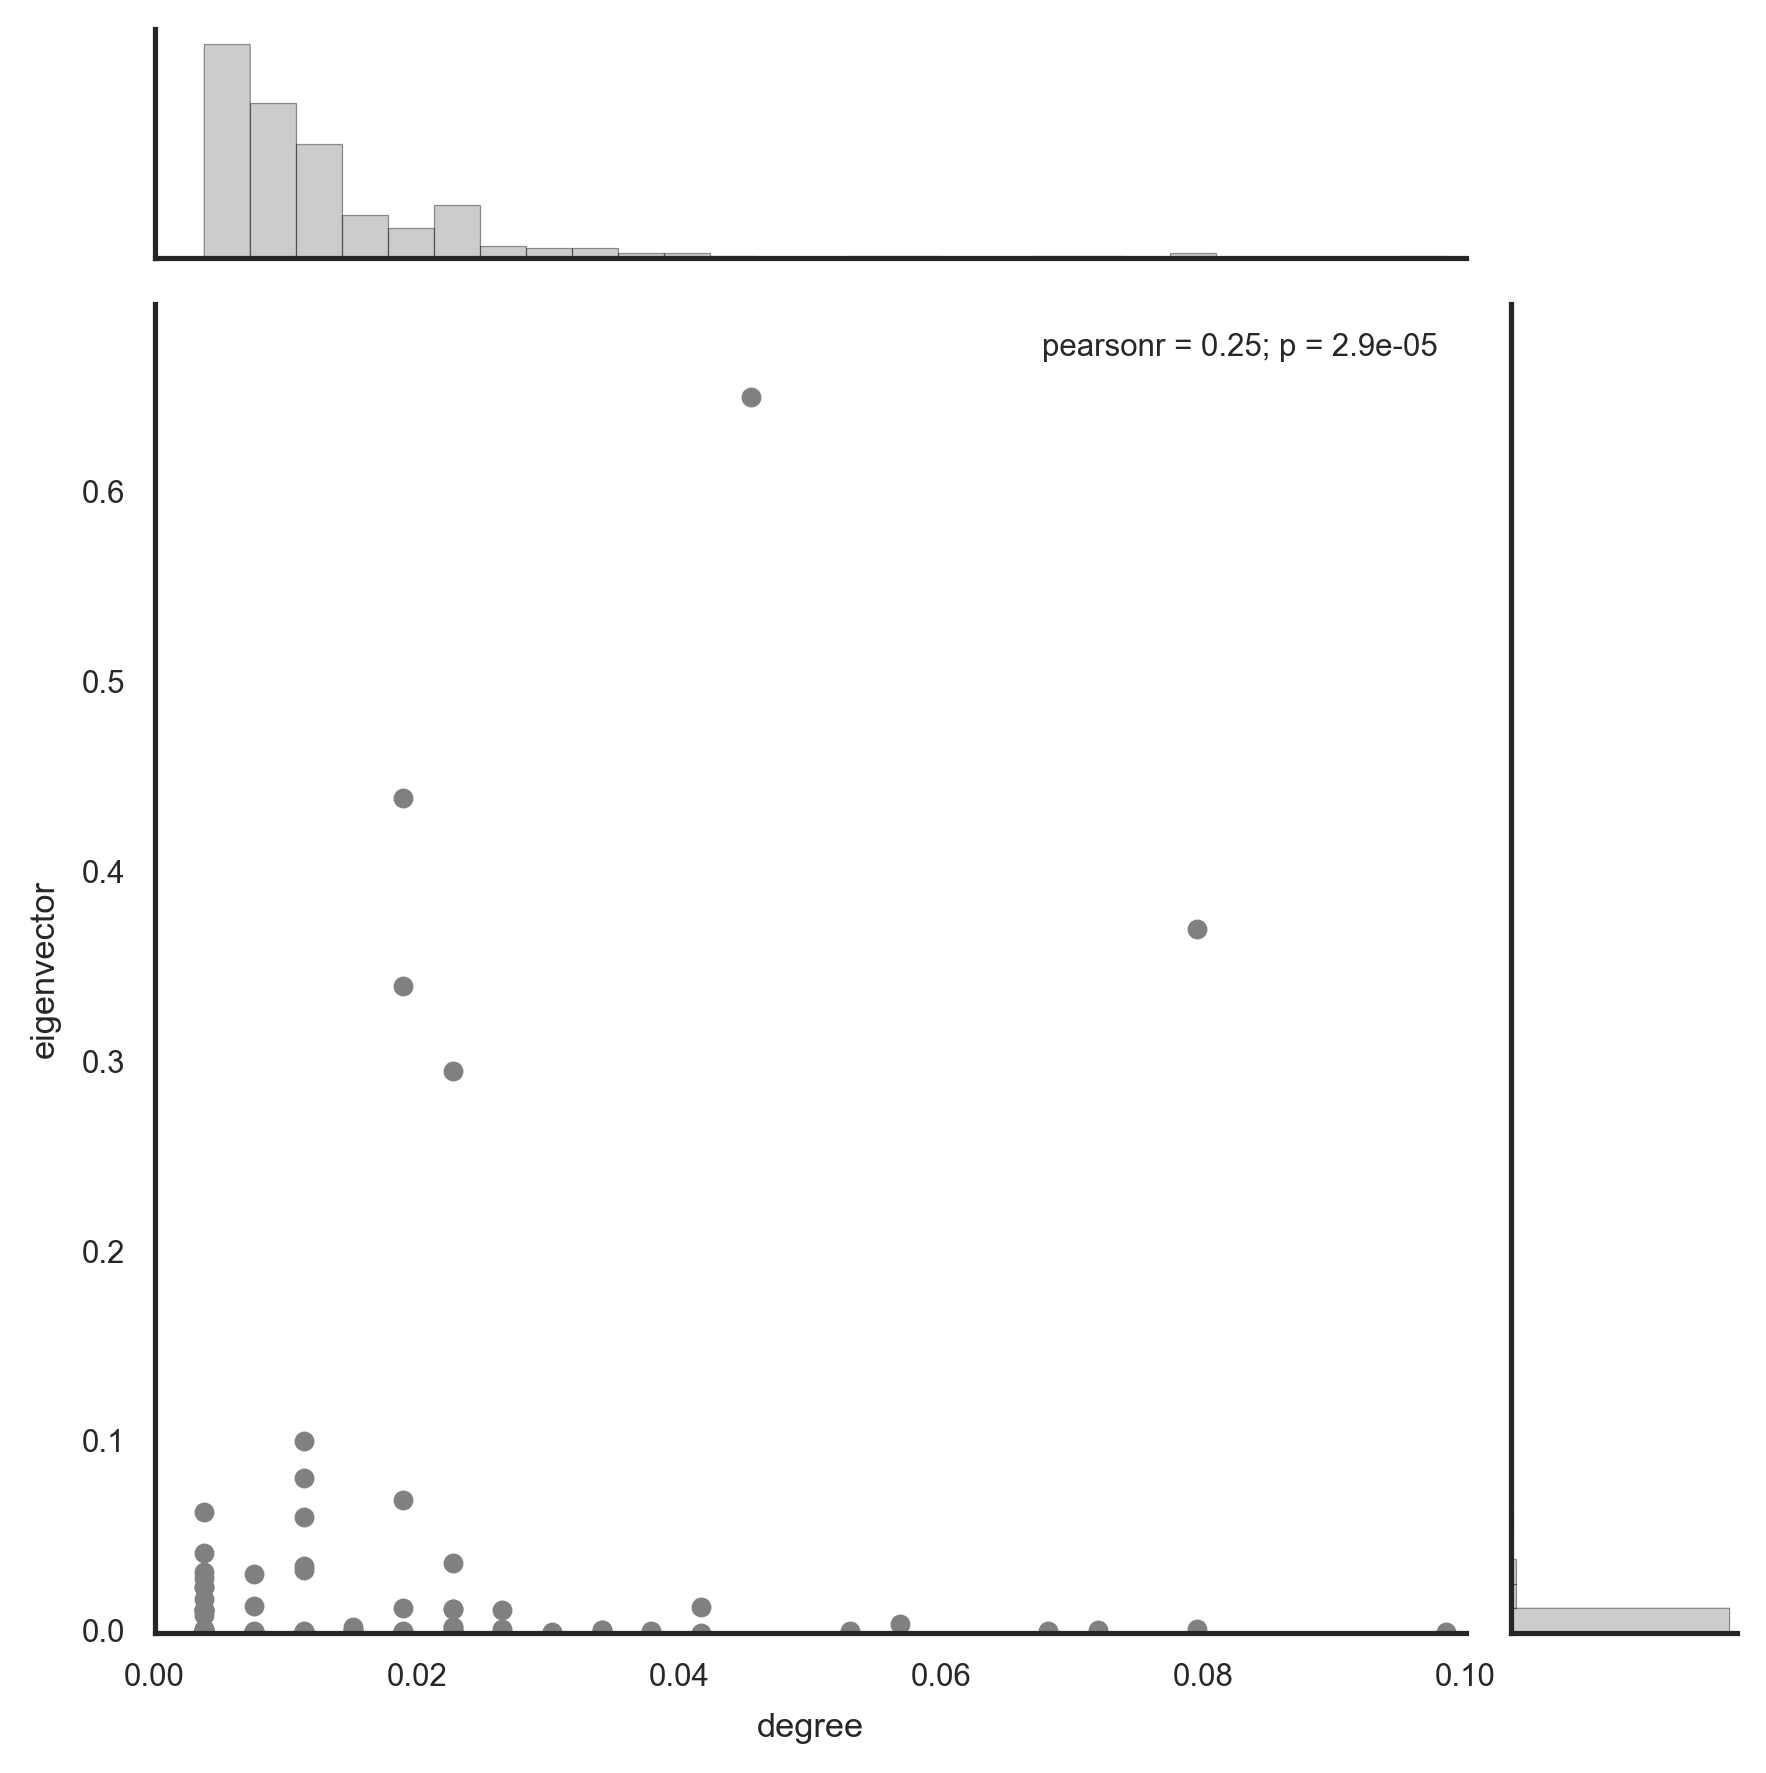

In [9]:
with sns.axes_style('white'):
    sns.jointplot(x='degree', y='eigenvector', data=cent_df, xlim = (0, .1), ylim = (0, .7), color = 'gray')
    sns.despine()
plt.savefig('figures/cent_scatterplot.pdf')

*Networkx* does an adequete job of creating static visualizations of networks, provided they are not too large.

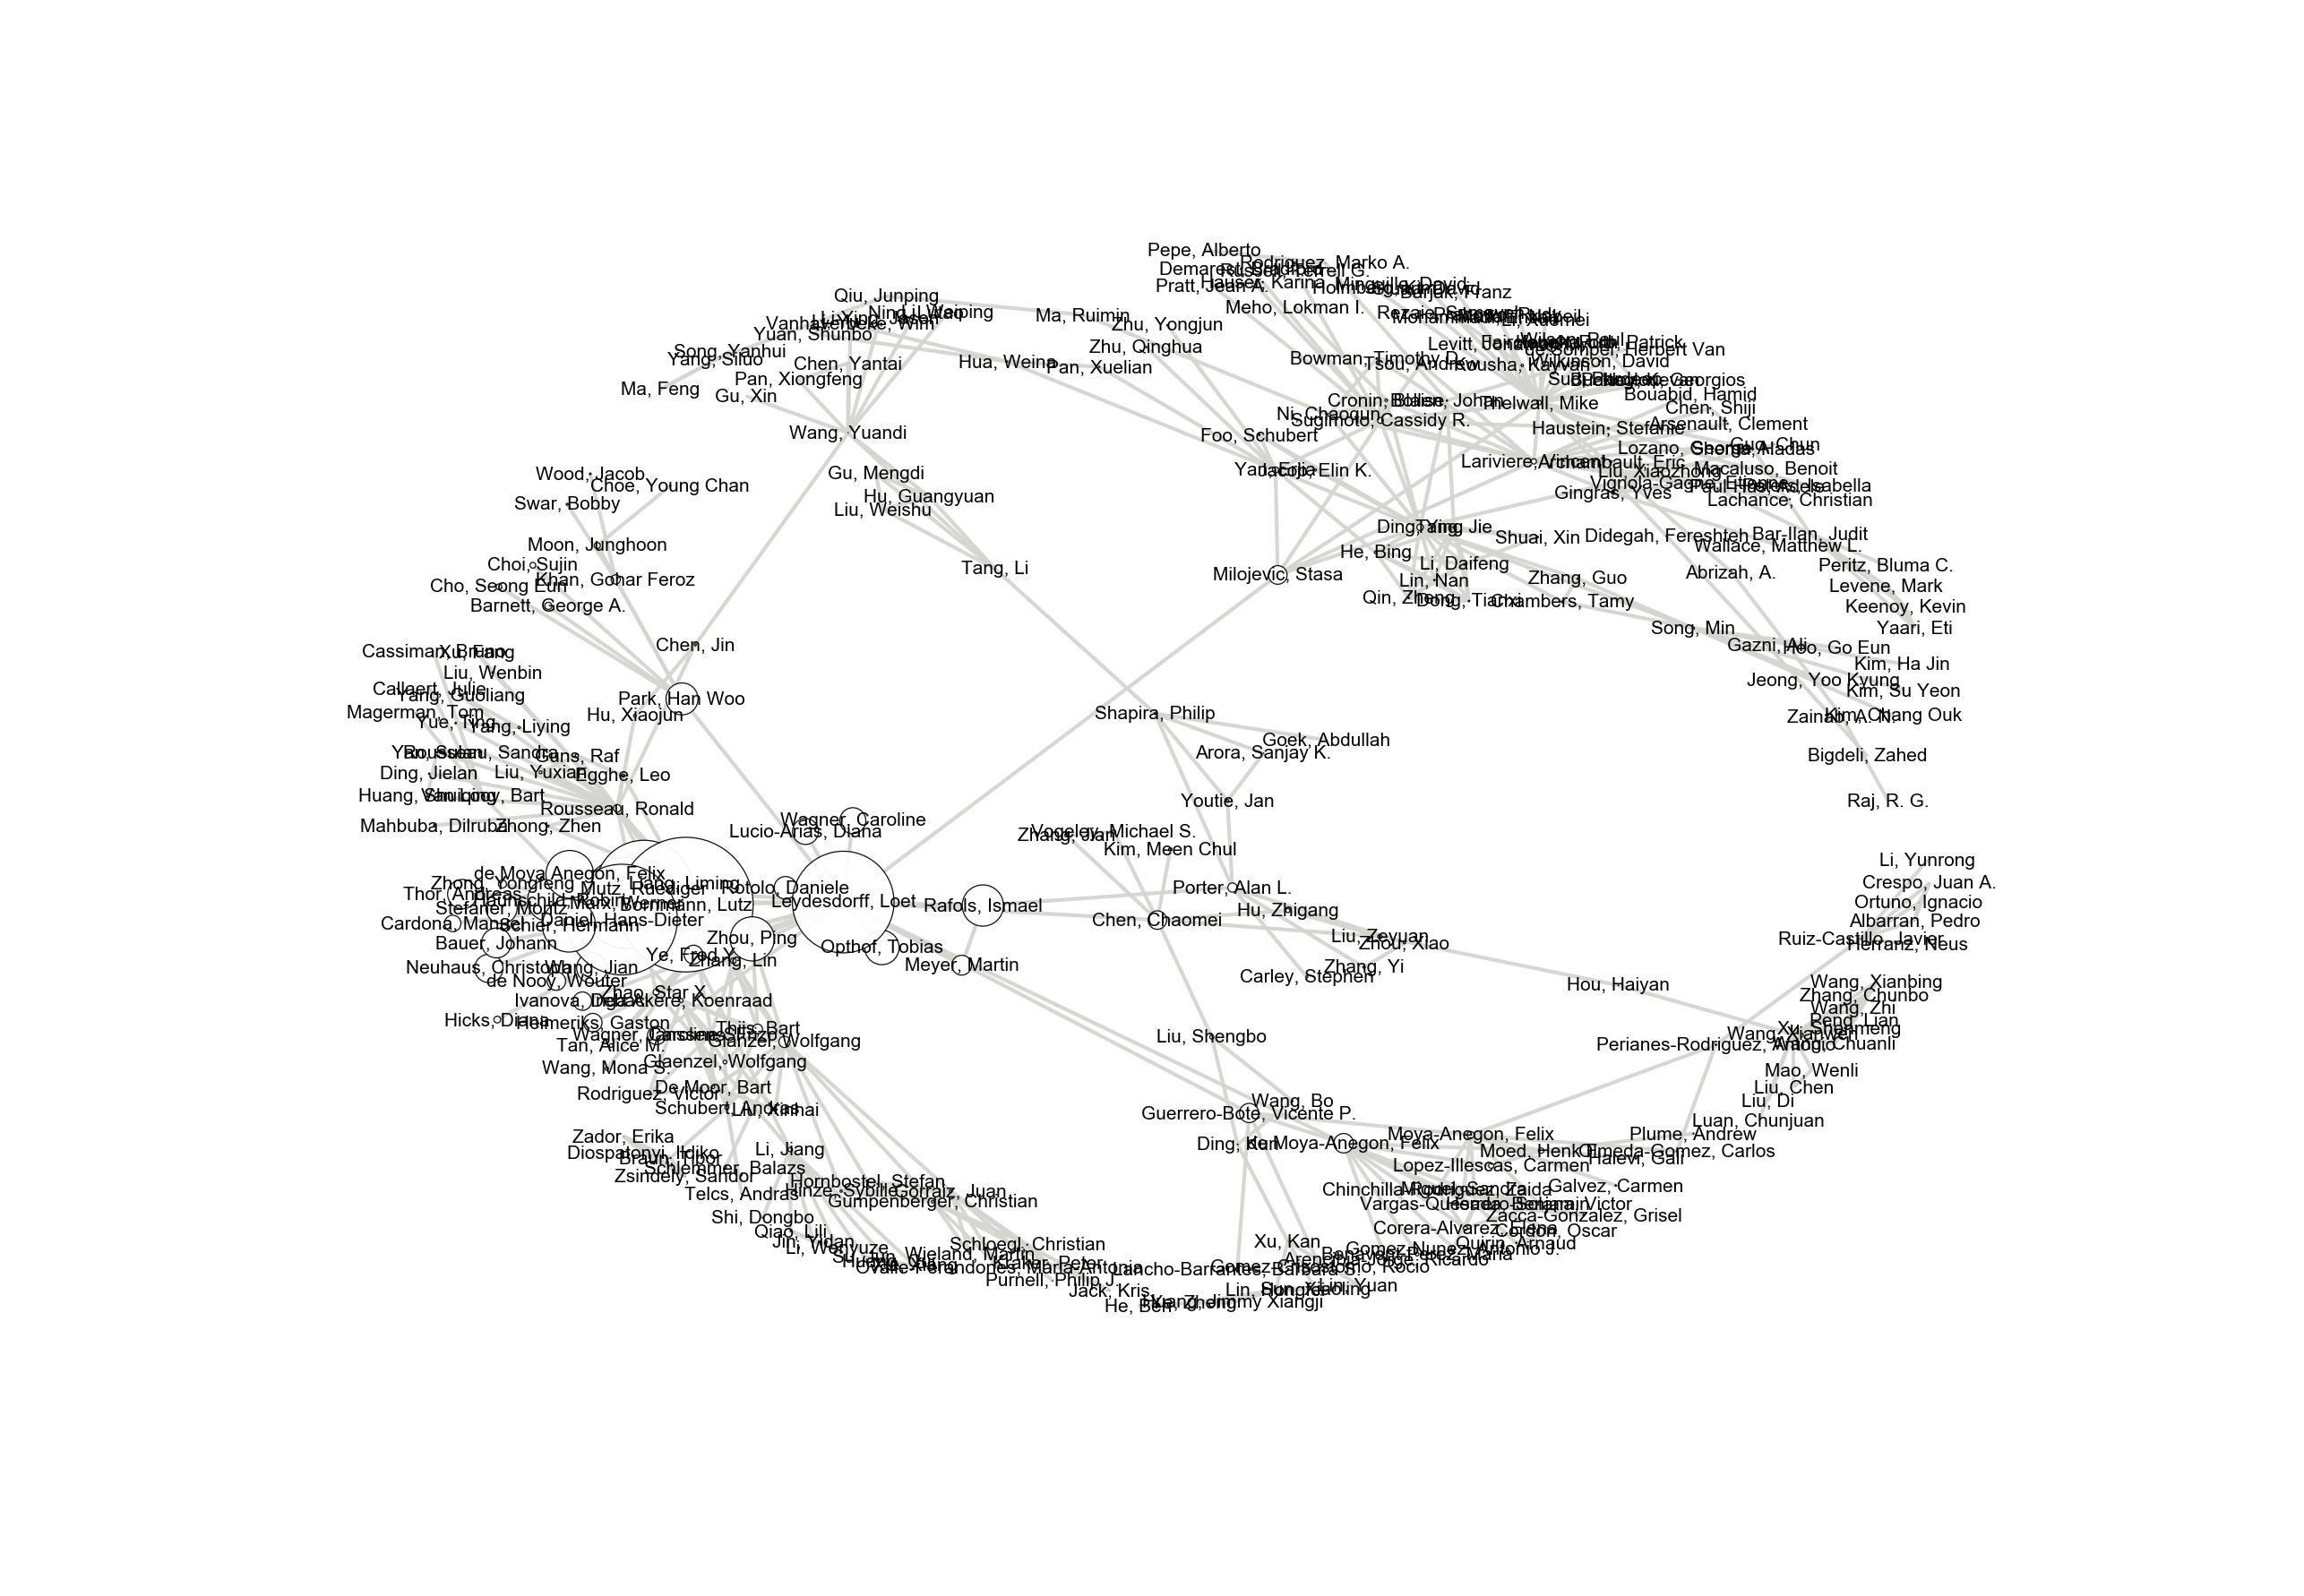

In [10]:
eig = nx.eigenvector_centrality(giant_coauth)
size = [2000 * eig[node] for node in giant_coauth]

nx.draw_spring(giant_coauth, node_size = size, with_labels = True, font_size = 5, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coauthors.pdf')

* use the *community* package to compute modularity and detect community structure in the network

In [11]:
partition = community.best_partition(giant_coauth)
modularity = community.modularity(partition, giant_coauth) 
print('Modularity:', modularity)

AttributeError: 'module' object has no attribute 'best_partition'

In [ ]:
colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant_coauth, node_color=colors , cmap=plt.cm.Accent)
plt.savefig('figures/coauthors_community.pdf')

# Co-Citation

In [12]:
journal_cocite = RC1014.networkCoCitation(coreOnly = True) 
mk.dropEdges(journal_cocite , minWeight = 3)
print(mk.graphStats(journal_cocite))

Nodes: 1261
Edges: 1119
Isolates: 889
Self loops: 21 
Density: 0.00140856
Transitivity: 0.300846


In [13]:
# visualize the giant component only
giantJournal = max(nx.connected_component_subgraphs(journal_cocite), key=len)

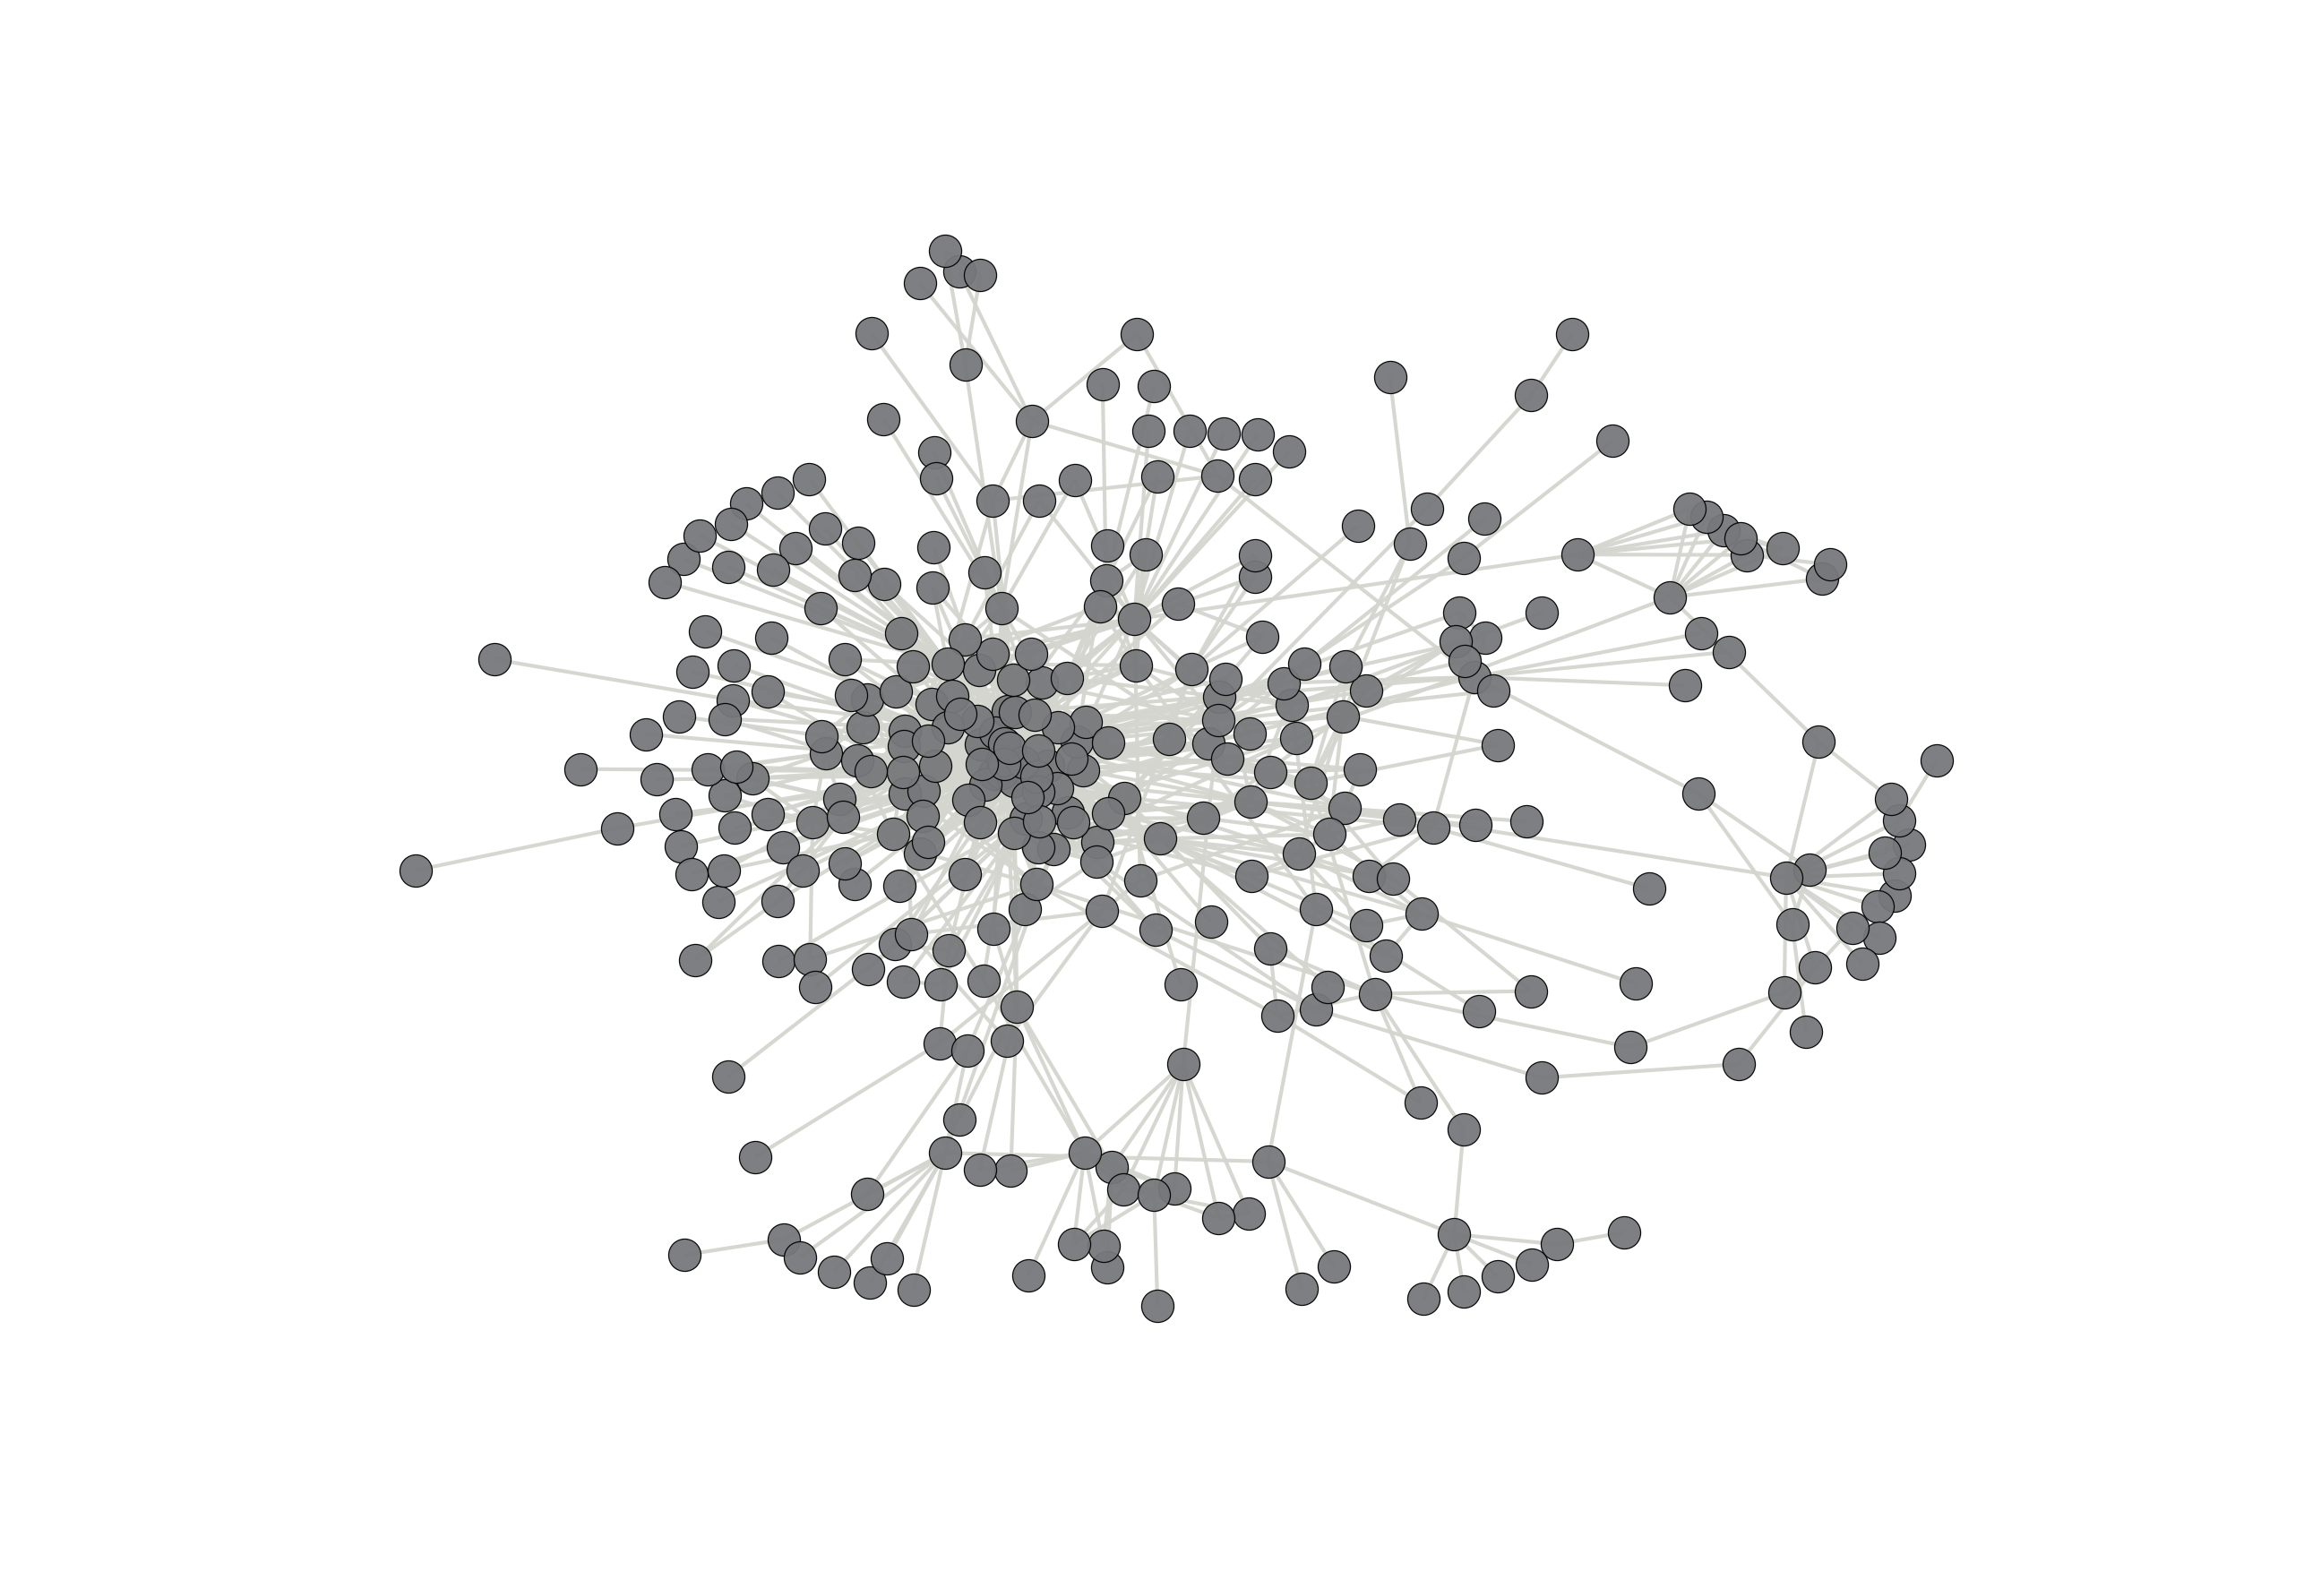

In [14]:
nx.draw_spring(giantJournal, with_labels = False, node_size = 75, 
              node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_journal_cocite.pdf')

In [ ]:
partition = community.best_partition(giant_coauth) 
modularity = community.modularity(partition, giant_coauth) 
print(modularity)

colors = [partition[n] for n in giant_coauth.nodes()] 
nx.draw_spring(giant_coauth, node_color=colors, with_labels = False, cmap=plt.cm.Accent, node_size = 75)
plt.savefig('figures/network_journal_cocite_community.pdf')

# Co-Investigator Networks

In [3]:
nserc_grants = mk.GrantCollection('raw_data/grants/nserc/')
print('There are', len(nserc_grants), 'Grants in this Grant Collection.')

There are 71184 Grants in this Grant Collection.


In [4]:
ci_nets = nserc_grants.networkCoInvestigator()
print(mk.graphStats(ci_nets))

Nodes: 33655
Edges: 130586
Isolates: 26284
Self loops: 4
Density: 0.00023059
Transitivity: 0.902158


For plotting purposes, let's restrict this network to recurring collaborations within the giant component. 

In [5]:
mk.dropEdges(ci_nets, minWeight = 4)
giant_ci = max(nx.connected_component_subgraphs(ci_nets), key=len)
print(mk.graphStats(giant_ci))

Nodes: 250
Edges: 680
Isolates: 0
Self loops: 0
Density: 0.0218474
Transitivity: 0.679722


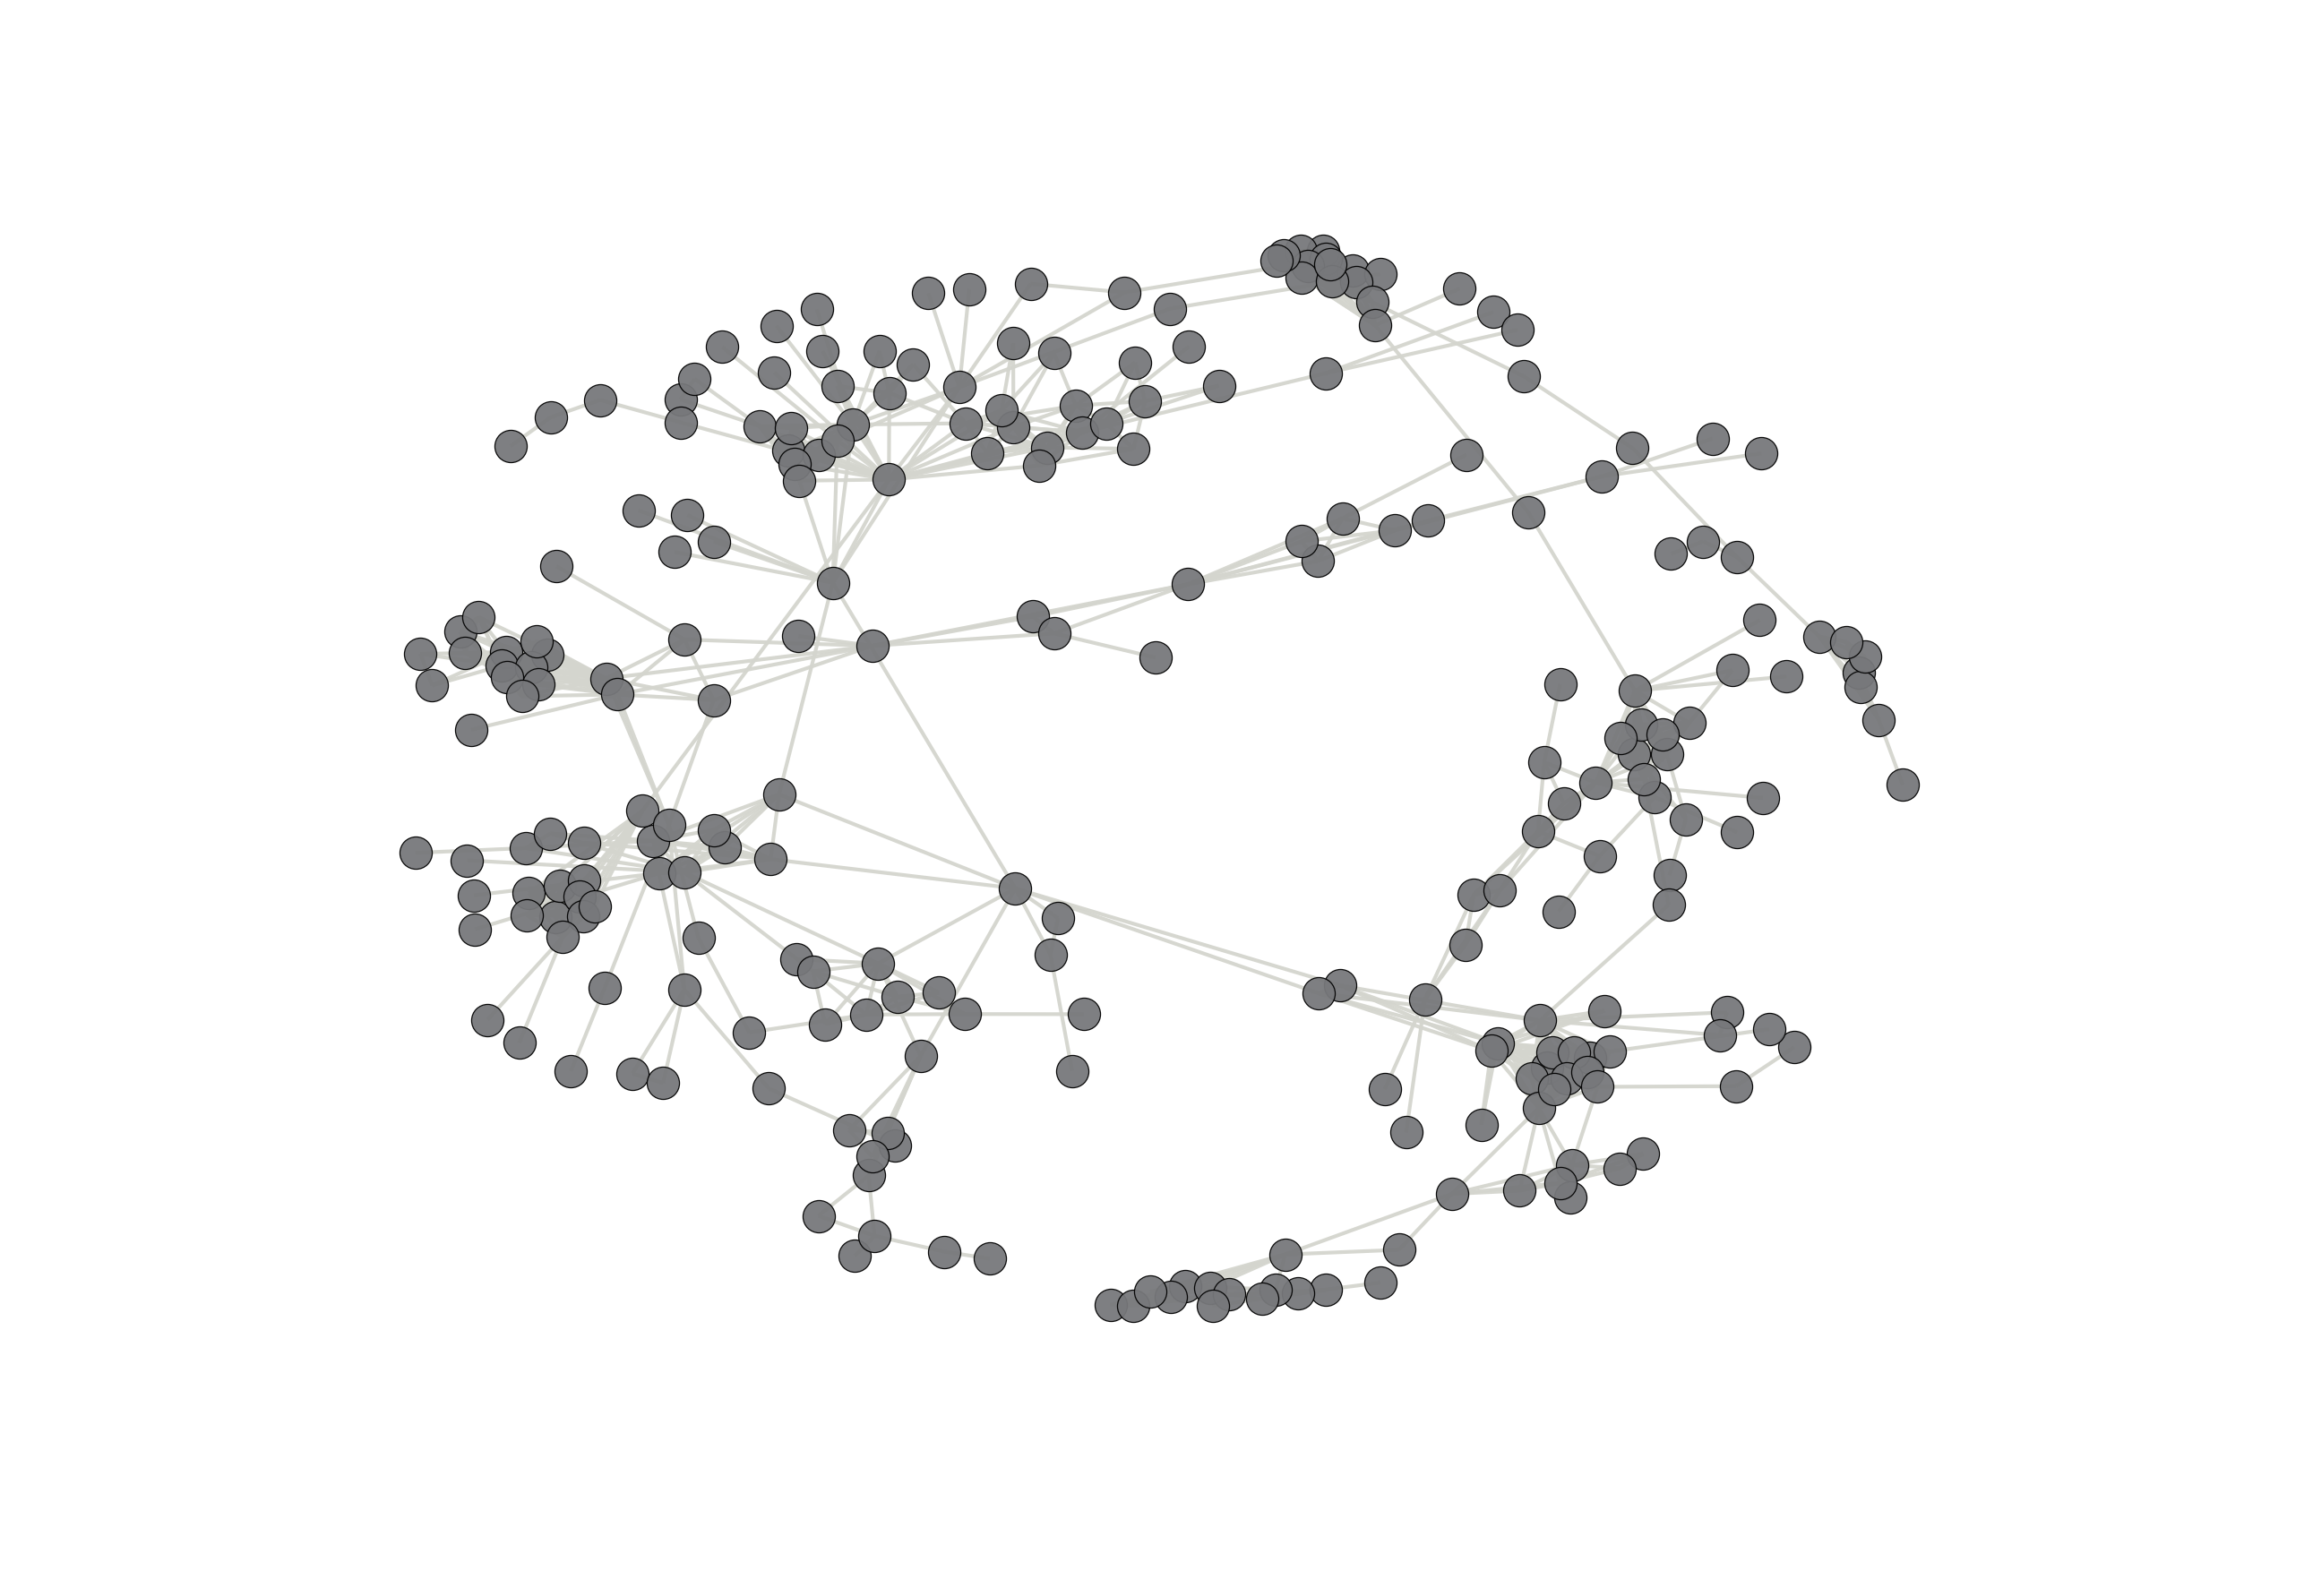

In [6]:
nx.draw_spring(giant_ci, with_labels = False, node_size = 75, 
              node_color = "#77787B", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_coinvestigators.pdf')

We can identify 10 researchers with the highest betweenness centrality scores. 

In [7]:
bet = nx.betweenness_centrality(giant_ci)
bet_df = pandas.DataFrame.from_dict([bet]).transpose()
bet_df.columns = ['betweenness']
bet_df.sort_values(by = ['betweenness'], ascending = False)[:10]

,betweenness
"Mi, Zetian",0.555067
"Farnood, Ramin",0.423123
"Botton, Gianluigi",0.403399
"Kortschot, Mark",0.345576
"Sain, Mohini",0.341042
"Kherani, Nazir",0.293202
"Wilkinson, David",0.283616
"Ruda, Harry",0.256005
"VandeVen, Theodorus",0.238875
"Hill, Reghan",0.238875


# One-Mode Networks (e.g. Keyword Co-Occurance)

Going back to the information science and bibliometrics `record collection`...

In [ ]:
keywords = RC1014.networkOneMode('keywords')
print(mk.graphStats(keywords))

In [ ]:
mk.dropEdges(keywords, minWeight = 10, dropSelfLoops = True) 
mk.dropNodesByDegree(keywords, minDegree = 1, useWeight = False)

keywordsGiant = max(nx.connected_component_subgraphs(keywords), key=len)
print(mk.graphStats(keywordsGiant))

In [ ]:
eig = nx.eigenvector_centrality(keywordsGiant)
size = [2000 * eig[node] for node in keywordsGiant]

nx.draw_spring(keywordsGiant, with_labels = False, node_size = size, 
               node_color = "#FFFFFF", edge_color = "#D4D5CE", alpha = .95)
plt.savefig('figures/network_keywords.pdf')

# Two-Mode Networks

In [ ]:
two_mode = RC1014.networkTwoMode('keywords', 'authorsFull') 
mk.dropEdges(two_mode, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(two_mode, minDegree = 1, useWeight = False)

two_mode = max(nx.connected_component_subgraphs(two_mode), key=len)
print(mk.graphStats(two_mode))

In [ ]:
deg = nx.degree_centrality(two_mode)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(two_mode, with_labels = False, node_size = size, 
               node_color = '#FFFFFF', edge_color = "#D4D5CE", alpha = .95)

# Multi-Level Networks

In [ ]:
multilevel = RC1014.networkMultiLevel('keywords', 'authorsFull')
mk.dropEdges(multilevel, minWeight = 3, dropSelfLoops = True) 
mk.dropNodesByDegree(multilevel, minDegree = 1, useWeight = False)

multilevelGiant = max(nx.connected_component_subgraphs(multilevel), key=len)
print(mk.graphStats(multilevelGiant))

In [ ]:
deg = nx.degree_centrality(multilevelGiant)
size = [2000 * deg[node] for node in two_mode]

nx.draw_spring(multilevelGiant, with_labels = False, node_size = size, 
               node_color = '#FFFFFF', edge_color = "#D4D5CE", alpha = .95)

# Writing Networks to Disk

In [ ]:
mk.writeGraph(coauth_net , 'generated_datasets/journal_document_cocitework')

# Interactive Network Visualizations with *mkD3*

To change the type of network that is being visualized, you can change two variables in the next cell.
- **`networkType`** should be set to `Citation`, `CoCitation`, or `CoAuthor`.
- **`nodeType`** should be set to `full`, `author`, `journal`, or `year`. (`full` nodes are individual articles or books)

In [ ]:
# Variables to Set
# ****************
networkType = "CoCitation"
nodeType = "full"

# Create the Network
# ******************
if networkType == "CoCitation":
    net = RC1014.networkCoCitation(nodeType = nodeType, coreOnly=True)
    directed = False
elif networkType == "CoAuthor":
    net = RC1014.networkCoAuthor()
    directed = False
elif networkType == "Citation":
    net = RC1014.networkCitation(nodeType=nodeType, coreOnly=True)
    directed = True
else:
    print("Please ensure networkType has been set to one of the accepted values")

# Simplify the Network
# ********************
mk.dropEdges(net, minWeight = 2, dropSelfLoops = True) 
net.remove_nodes_from(nx.isolates(net)) # Remove nodes which are isolates


# Add Node Data
# *************
if not directed: 
    partition = community.best_partition(net)
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        comm = partition[n]
        net.add_node(n, community=comm, betweenness=betw)
else: 
    betweenness = nx.betweenness_centrality(net)
    for n in net.nodes():
        betw = round(betweenness[n], 3)
        net.add_node(n, betweenness=betw)

mk.writeGraph(net, "generated_datasets/network")

# Create Link to Heatmap
from IPython.display import display, HTML
display(HTML('<a href="mkD3_static/network.html target="_blank"">Open network graph</a>'))